In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Pp
df = pd.read_csv('../pp_combined_with_SRR_all.csv')

In [9]:
df.shape

(35, 9)

In [10]:
df.head()

,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,SRR_ID,MAG_ID
0,k141_1028409:1445-1460-2089-2104,36,8,0.18,25,5,0.17,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.207
1,k141_1039875:34300-34321-34450-34471,26,34,0.57,16,23,0.59,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.101
2,k141_1089092:2742-2766-3312-3336,8,12,0.60,6,6,0.50,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.137
3,k141_1238977:3580-3622-4202-4244,6,14,0.70,1,8,0.89,SRR19415656,WILDCHIMP_F04_WC30_S30__DASTool_bins.metabat2.074
4,k141_132640:119357-119378-119615-119636,180,18,0.09,124,12,0.09,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.metabat2.415


In [11]:
len(df['ID'].unique())

32

In [12]:
len(df['SRR_ID'].unique())

6

In [13]:
bonobo_tax_bac = pd.read_csv('../metadata/bonobo_SGBs.bac120.summary.tsv', sep='\t')
bonobo_tax_arc = pd.read_csv('../metadata/bonobo_SGBs.ar53.summary.tsv', sep='\t')
bonobo_tax = pd.concat([bonobo_tax_bac, bonobo_tax_arc], ignore_index=True)

In [14]:
bonobo_tax['classification'][1]

'd__Bacteria;p__Bacillota;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Fusicatenibacter;s__Fusicatenibacter massiliensis_A'

In [15]:
bonobo_df = pd.merge(df, bonobo_tax, left_on='MAG_ID', right_on='user_genome', how='inner')
# Count unique IDs per MAG_ID
unique_counts = bonobo_df.groupby('MAG_ID')['ID'].nunique().reset_index()

# Rename the column
unique_counts.rename(columns={'ID': 'unique_ID_count'}, inplace=True)

# Merge back to the original DataFrame
bonobo_df = bonobo_df.merge(unique_counts, on='MAG_ID', how='left')
bonobo_df.head()

,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,SRR_ID,MAG_ID,user_genome,...,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings,unique_ID_count
0,k141_1028409:1445-1460-2089-2104,36,8,0.18,25,5,0.17,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.207,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.207,...,0.759,d__Bacteria;p__Bacillota;c__Clostridia;o__Lach...,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCA_963597485.1, s__CAG-791 sp963597485, 95.0,...",90.31,11.0,0.99844,Genome not assigned to closest species as it f...,1
1,k141_1039875:34300-34321-34450-34471,26,34,0.57,16,23,0.59,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.101,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.101,...,NaN,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,taxonomic classification fully defined by topo...,classification based on placement in class-lev...,NaN,92.49,11.0,0.97202,NaN,2
2,k141_1089092:2742-2766-3312-3336,8,12,0.60,6,6,0.50,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.137,WILDCHIMP_D04_WC28_S28__DASTool_bins.concoct.137,...,NaN,NaN,ani_screen,classification based on ANI only,"GCA_934691725.1, s__Hallerella sp934691725, 95...",NaN,NaN,NaN,NaN,1
3,k141_1238977:3580-3622-4202-4244,6,14,0.70,1,8,0.89,SRR19415656,WILDCHIMP_F04_WC30_S30__DASTool_bins.metabat2.074,WILDCHIMP_F04_WC30_S30__DASTool_bins.metabat2.074,...,NaN,NaN,ani_screen,classification based on ANI only,"GCA_963593385.1, s__Bulleidia sp963593385, 95....",NaN,NaN,NaN,NaN,1
4,k141_132640:119357-119378-119615-119636,180,18,0.09,124,12,0.09,SRR19415685,WILDCHIMP_D04_WC28_S28__DASTool_bins.metabat2.415,WILDCHIMP_D04_WC28_S28__DASTool_bins.metabat2.415,...,NaN,d__Bacteria;p__Bacillota;c__Clostridia;o__Lach...,taxonomic novelty determined using RED,classification based on placement in class-lev...,NaN,93.17,11.0,0.86567,NaN,2


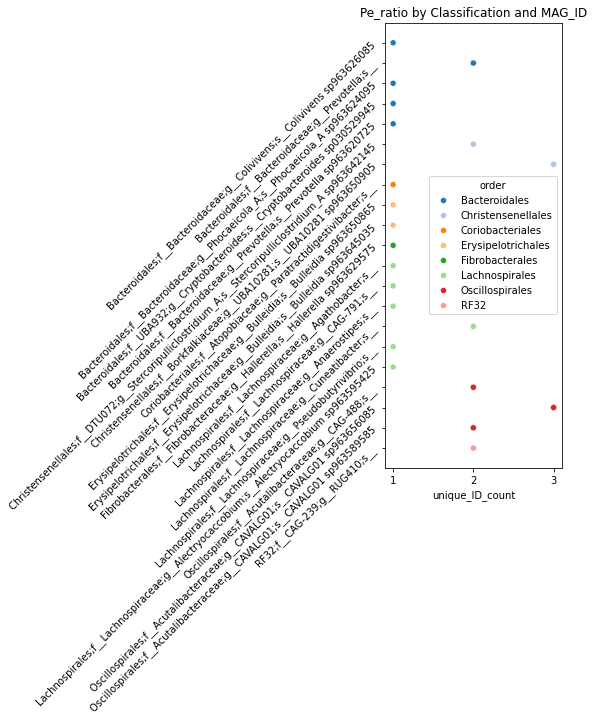

In [77]:
import warnings
from matplotlib import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
#Echimpanzees
#plot x axis are classification, y axis are ID, plot the Pe_ratio
combined_df = bonobo_df
combined_df['MAG_ID'] = combined_df['MAG_ID'].astype(str)
combined_df['ID'] = combined_df['ID'].astype(str)  # if you use ID as y-axis
# Make sure classification is string
combined_df['classification'] = combined_df['classification'].astype(str)

# Keep everything after 'o__'
combined_df['after_order'] = combined_df['classification'].apply(
    lambda x: x.split('o__', 1)[1].lstrip(';') if 'o__' in x else 'Unknown'
)

# Extract the order
combined_df['order'] = combined_df['classification'].str.extract(r'o__(.*?);')

# Sort by order
combined_df_sorted = combined_df.sort_values('order', ascending=True)

# Assign a color palette for orders
unique_orders = combined_df_sorted['order'].unique()
palette = dict(zip(unique_orders, sns.color_palette("tab20", n_colors=len(unique_orders))))

plt.figure(figsize=(8, 10))
sns.scatterplot(
    data=combined_df_sorted,
    y='after_order',
    x='unique_ID_count',
    #size='Pe_ratio',        # optional: scale marker size by Pe_ratio
    hue='order',        # optional: color by Pe_ratio
    palette=palette      # color palette
    #legend='brief'
)

#plt.yticks(rotation=45, ha='right')      # rotate x labels if needed
#plt.xticks(range(1,9))
plt.yticks(range(len(combined_df_sorted['after_order'].unique())),
           combined_df_sorted['after_order'].unique(), rotation=45, ha='right')
plt.xticks(sorted(combined_df_sorted['unique_ID_count'].unique()))
plt.ylabel('', fontsize=12, labelpad=10, loc='center')
plt.title('Pe_ratio by Classification and MAG_ID')
plt.tight_layout()
plt.show()

In [28]:
#Pt
df = pd.read_csv('../pt_combined_with_SRR_all.csv')

In [29]:
df.shape

(13, 9)

In [30]:
df.head()

,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,SRR_ID,MAG_ID
0,k141_1266446:6691-6703-6741-6753,52,12,0.19,31,5,0.14,SRR19415655,WILDCHIMP_B05_WC34_S34__DASTool_bins.concoct.0...
1,k141_140520:40487-40502-41165-41180,0,8,1.00,0,4,1.00,SRR19415660,WILDCHIMP_H04_WC32_S32__DASTool_bins.concoct.227
2,k141_144478:2203-2222-2337-2356,30,6,0.17,24,5,0.17,SRR19415655,WILDCHIMP_H04_WC32_S32__DASTool_bins.concoct.1...
3,k141_154859:4522-4545-4694-4717,16,34,0.68,9,21,0.70,SRR19415655,WILDCHIMP_D05_WC36_S36__DASTool_bins.concoct.220
4,k141_158980:371-386-486-501,14,16,0.53,13,12,0.48,SRR19415655,WILDCHIMP_C05_WC35_S35__DASTool_bins.metabat2....


In [21]:
len(df['ID'].unique())

12

In [20]:
len(df['SRR_ID'].unique())

3

In [34]:
chimpanzees_tax_bac = pd.read_csv('../metadata/chimp_SGBs.bac120.summary.tsv', sep='\t')
chimpanzees_tax_arc = pd.read_csv('../metadata/chimp_SGBs.ar53.summary.tsv', sep='\t')
chimpanzees_tax = pd.concat([chimpanzees_tax_bac, chimpanzees_tax_arc], ignore_index=True)

In [36]:
chimpanzees_tax.shape

(171, 20)

In [39]:
chimpanzees_df = pd.merge(df, chimpanzees_tax, left_on='MAG_ID', right_on='user_genome', how='inner')
# Count unique IDs per MAG_ID
unique_counts = chimpanzees_df.groupby('MAG_ID')['ID'].nunique().reset_index()

# Rename the column
unique_counts.rename(columns={'ID': 'unique_ID_count'}, inplace=True)

# Merge back to the original DataFrame
chimpanzees_df = chimpanzees_df.merge(unique_counts, on='MAG_ID', how='left')
chimpanzees_df.shape

(13, 30)

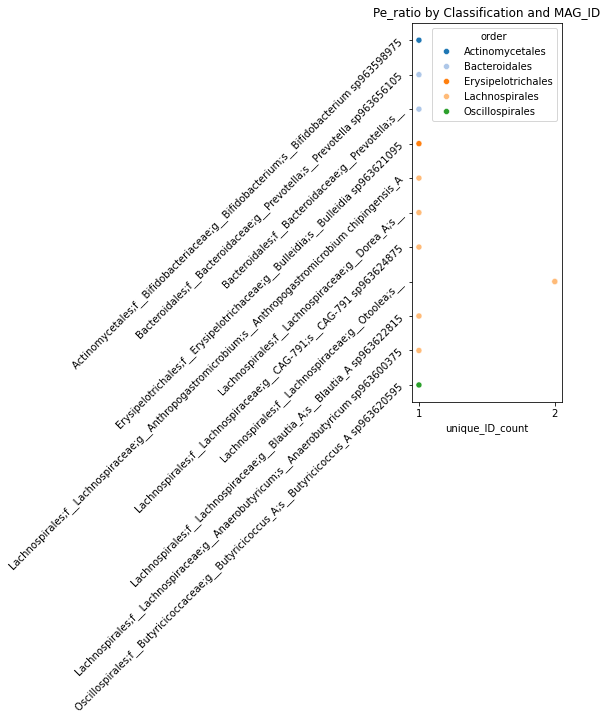

In [76]:
import warnings
from matplotlib import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
#Echimpanzees
#plot x axis are classification, y axis are ID, plot the Pe_ratio
combined_df = chimpanzees_df
combined_df['MAG_ID'] = combined_df['MAG_ID'].astype(str)
combined_df['ID'] = combined_df['ID'].astype(str)  # if you use ID as y-axis
# Make sure classification is string
combined_df['classification'] = combined_df['classification'].astype(str)

# Keep everything after 'o__'
combined_df['after_order'] = combined_df['classification'].apply(
    lambda x: x.split('o__', 1)[1].lstrip(';') if 'o__' in x else 'Unknown'
)

# Extract the order
combined_df['order'] = combined_df['classification'].str.extract(r'o__(.*?);')

# Sort by order
combined_df_sorted = combined_df.sort_values('order', ascending=True)

# Assign a color palette for orders
unique_orders = combined_df_sorted['order'].unique()
palette = dict(zip(unique_orders, sns.color_palette("tab20", n_colors=len(unique_orders))))

plt.figure(figsize=(8, 10))
sns.scatterplot(
    data=combined_df_sorted,
    y='after_order',
    x='unique_ID_count',
    #size='Pe_ratio',        # optional: scale marker size by Pe_ratio
    hue='order',        # optional: color by Pe_ratio
    palette=palette      # color palette
    #legend='brief'
)

#plt.yticks(rotation=45, ha='right')      # rotate x labels if needed
#plt.xticks(range(1,9))
plt.yticks(range(len(combined_df_sorted['after_order'].unique())),
           combined_df_sorted['after_order'].unique(), rotation=45, ha='right')
plt.xticks(sorted(combined_df_sorted['unique_ID_count'].unique()))
plt.ylabel('', fontsize=12, labelpad=10, loc='center')
plt.title('Pe_ratio by Classification and MAG_ID')
plt.tight_layout()
plt.show()

In [41]:
#Pts
df = pd.read_csv('../pts_combined_with_SRR_all.csv')

In [42]:
df.shape

(178, 9)

In [43]:
df.head()

,ID,Pe_F,Pe_R,Pe_ratio,Span_F,Span_R,Span_ratio,SRR_ID,MAG_ID
0,c_000000000001:241699-241715-241756-241772,0,150,1.00,0,122,1.00,SRR19415690,WC5_bin.19.contigs
1,c_000000000001:31028-31044-31142-31158,2,6,0.75,2,6,0.75,SRR19415683,WC16_69.contigs
2,c_000000000001:31028-31044-31142-31158,0,8,1.00,0,8,1.00,SRR19415682,WC16_69.contigs
3,c_000000000001:31028-31044-31142-31158,0,8,1.00,0,8,1.00,SRR19415690,WC16_69.contigs
4,c_000000000002:374932-374955-375024-375047,18,16,0.47,8,8,0.50,SRR19415683,WC5_WC5.009.contigs


In [27]:
len(df['ID'].unique())

127

In [13]:
len(df['SRR_ID'].unique())

11

In [44]:
Echimpanzees_tax_bac = pd.read_csv('../metadata/Echimp_SGBs.bac120.summary.tsv', sep='\t')
Echimpanzees_tax_arc = pd.read_csv('../metadata/Echimp_SGBs.ar53.summary.tsv', sep='\t')
Echimpanzees_tax = pd.concat([Echimpanzees_tax_bac, Echimpanzees_tax_arc], ignore_index=True)

In [46]:
Echimpanzees_df = pd.merge(df, Echimpanzees_tax, left_on='MAG_ID', right_on='user_genome', how='inner')
# Count unique IDs per MAG_ID
unique_counts = Echimpanzees_df.groupby('MAG_ID')['ID'].nunique().reset_index()

# Rename the column
unique_counts.rename(columns={'ID': 'unique_ID_count'}, inplace=True)

# Merge back to the original DataFrame
Echimpanzees_df = Echimpanzees_df.merge(unique_counts, on='MAG_ID', how='left')
Echimpanzees_df.shape

(178, 30)

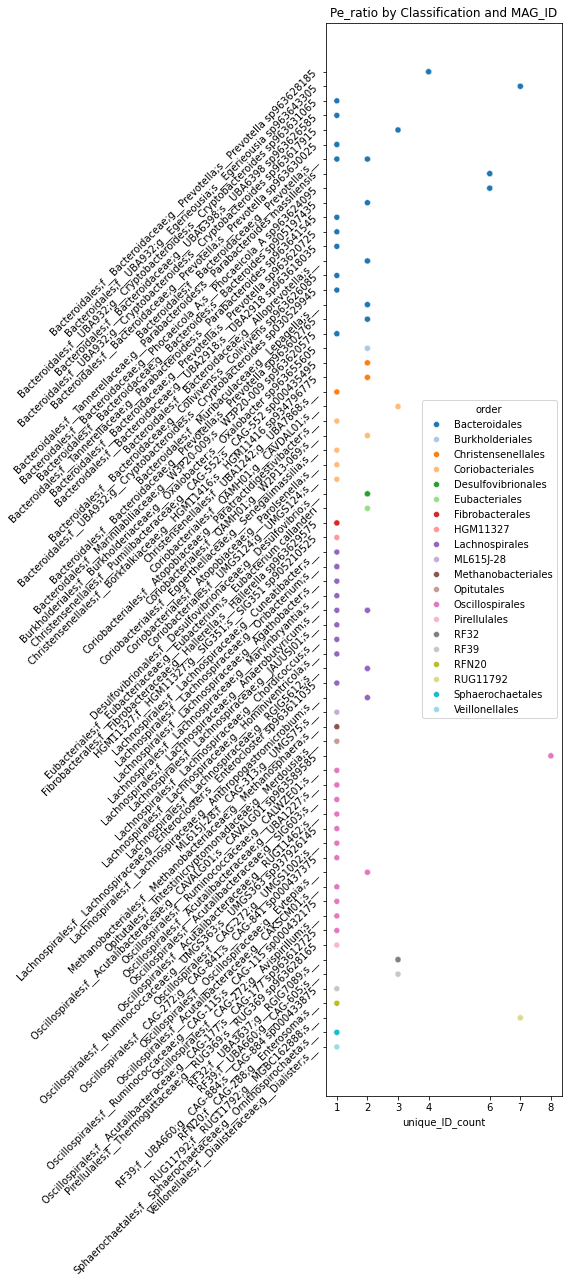

In [74]:
import warnings
from matplotlib import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
#Echimpanzees
#plot x axis are classification, y axis are ID, plot the Pe_ratio
combined_df = Echimpanzees_df
combined_df['MAG_ID'] = combined_df['MAG_ID'].astype(str)
combined_df['ID'] = combined_df['ID'].astype(str)  # if you use ID as y-axis
# Make sure classification is string
combined_df['classification'] = combined_df['classification'].astype(str)

# Keep everything after 'o__'
combined_df['after_order'] = combined_df['classification'].apply(
    lambda x: x.split('o__', 1)[1].lstrip(';') if 'o__' in x else 'Unknown'
)

# Extract the order
combined_df['order'] = combined_df['classification'].str.extract(r'o__(.*?);')

# Sort by order
combined_df_sorted = combined_df.sort_values('order', ascending=True)

# Assign a color palette for orders
unique_orders = combined_df_sorted['order'].unique()
palette = dict(zip(unique_orders, sns.color_palette("tab20", n_colors=len(unique_orders))))

plt.figure(figsize=(8, 18))
sns.scatterplot(
    data=combined_df_sorted,
    y='after_order',
    x='unique_ID_count',
    #size='Pe_ratio',        # optional: scale marker size by Pe_ratio
    hue='order',        # optional: color by Pe_ratio
    palette=palette      # color palette
    #legend='brief'
)

#plt.yticks(rotation=45, ha='right')      # rotate x labels if needed
#plt.xticks(range(1,9))
plt.yticks(range(len(combined_df_sorted['after_order'].unique())),
           combined_df_sorted['after_order'].unique(), rotation=45, ha='right')
plt.xticks(sorted(combined_df_sorted['unique_ID_count'].unique()))
plt.ylabel('', fontsize=12, labelpad=10, loc='center')
plt.title('Pe_ratio by Classification and MAG_ID')
plt.tight_layout()
plt.show()